<a href="https://colab.research.google.com/github/peeush-agarwal/week-based-learning/blob/master/Deep-Learning/Datasets/cifar10_dataset_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 dataset

Train neural network to classify images in CIFAR-10 dataset. 

The dataset consists: 
+ 60,000 32x32 colour images in 10 classes, with 6000 images per class. 
  + 50,000 training images, and 
  + 10,000 test images.

## Import libraries

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

## Load dataset

In [2]:
trainset = datasets.CIFAR10(root='./Data', train=True, transform = transforms.ToTensor(), download=True)
testset = datasets.CIFAR10(root='./Data', train=False, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
batch_size = 4

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False)

In [5]:
print(trainset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Visualize sample images

In [0]:
def imshow(images, labels):
  plt.imshow(images.numpy().transpose((1, 2, 0)))
  plt.title([trainset.classes[label.item()] for label in labels])
  plt.axis('off')
  plt.show()

torch.Size([4, 3, 32, 32])


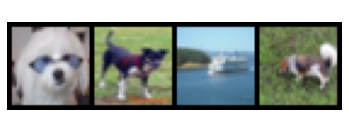

In [7]:
images, labels = next(iter(trainloader))

print(images.shape)
images = torchvision.utils.make_grid(images)

imshow(images, labels)

## Build Neural network to classify images  

### Prepare methods to train and evaluate different models

In [0]:
def train(model, criterion, optimizer, trainloader, device, n_epochs, display_loss = True):
  epoch_loss = []
  for epoch in range(n_epochs):
    running_loss = 0
    for batch_id, data in enumerate(trainloader):
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()                 # Reset parameters

      outputs = model(images)               # Forward pass
      loss = criterion(outputs, labels)     # Compute loss
      loss.backward()                       # Backpropogation
      optimizer.step()                      # Update parameters

      running_loss += loss.item()
    epoch_loss.append(running_loss/len(trainloader))
  
  if display_loss:
    plt.plot(epoch_loss)
    plt.title(f'Epoch loss: Min={min(epoch_loss):.4f}, Max={max(epoch_loss):.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [0]:
def eval_(model, criterion, testloader, device):
  model.eval()
  with torch.no_grad():
    total = 0
    correct = 0
    for data in testloader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)

      total += len(images)
      correct += (predicted == labels).sum()
    
    print(f'Accuracy:{100.0*correct/total}')

### Fetch computing device

In [0]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

### Load dataset again to have larger batch_size

In [0]:
batch_size = 512

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)

### Neural networks

#### Basic neural network

In [0]:
class NN_Basic(nn.Module):
  def __init__(self):
    super(NN_Basic, self).__init__()

    self.classifier = nn.Sequential(
        nn.Linear(3*32*32, 32),
        nn.ReLU(),
        nn.Linear(32, 10)
    )
  
  def forward(self, x):
    x = x.view(-1, 3*32*32)
    out = self.classifier(x)
    return out

In [0]:
model_basic = NN_Basic().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_basic.parameters(), lr=0.01)

In [18]:
print(f'BasicModel-HiddenLayer:1,Neurons:32,LR=0.01,BatchSize:512, Epochs:10')

BasicModel-HiddenLayer:1,Neurons:32,LR=0.01,BatchSize:512, Epochs:10


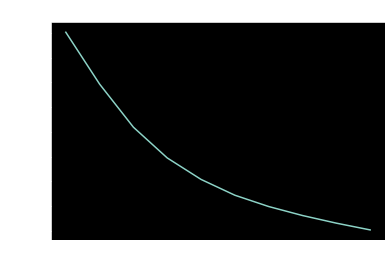

CPU times: user 9.16 s, sys: 1.82 s, total: 11 s
Wall time: 1min 1s


In [19]:
%%time
train(model_basic, criterion, optimizer, trainloader, device, n_epochs=10)

In [21]:
eval_(model_basic, criterion, testloader, device)

Accuracy:35.91999816894531
